In [15]:
# import libraries
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import numpy
import warnings

In [16]:
#!/usr/bin/env /Applications/MAMP/Library/bin/python

import mysql.connector

config = {
  'user': 'root',
  'password': 'root',
  'host': '127.0.0.1',
  'port': 8889,
  'database': 'ecotourisme',
  'raise_on_warnings': True
}

cnx = mysql.connector.connect(**config)

cursor = cnx.cursor(dictionary=True)

cursor.execute('SELECT * FROM `ecologie` where id_pays = "US"')
results = cursor.fetchall()
cnx.close()

data = pd.DataFrame(results)


In [17]:
data = data.set_index('annee')
series = data[['elecRenew']]

MISE EN PLACE DES PREDICTIONS HORS ECHANTILLION

In [18]:
X = series.values

In [19]:
# calcule les tendances entre k et k+1 
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
		warnings.filterwarnings("ignore")
	return numpy.array(diff)

# transformer les prédictions faite sur la série transformer en valeur réel
def inverse_difference(history, prediction, interval=1):
 return prediction + history[-interval]

differenced = difference(X)

# apprentissage supervisé du modèle 
model = ARIMA(differenced, order=(10,2,1))
model_fit = model.fit()


In [20]:
# des prévisions sont générées pour un nombre spécifié de pas de temps dans le futur
forecast = model_fit.forecast(steps=7)
print(forecast)

# inverse les prédictions faite  pour avoir les valeurs réelles 
history = [x for x in X] # crée une copie de la série originale X 
annee = 1
for prediction in forecast:
	inverted = inverse_difference(history, prediction)
	print('Année %d: %f' % (annee, inverted))
	history.append(inverted)
	annee += 1


[-1.75573468  2.09323519  2.17549018  0.31050397  1.76440852  1.7565652
 -0.13675324]
Année 1: 18.559958
Année 2: 20.653194
Année 3: 22.828684
Année 4: 23.139188
Année 5: 24.903596
Année 6: 26.660161
Année 7: 26.523408


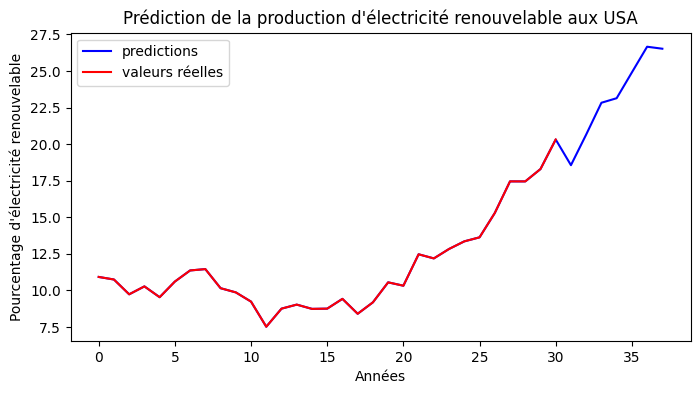

In [21]:
pyplot.figure(figsize=(8, 4))

# afficher les prédictions en bleu et les valeurs réelles en rouge
pyplot.plot(history, color='blue')
pyplot.plot(X, color='red')
pyplot.legend(['predictions', 'valeurs réelles'])

# titre et axes du graphe
pyplot.title('Prédiction de la production d\'électricité renouvelable aux USA')
pyplot.xlabel('Années')
pyplot.ylabel('Pourcentage d\'électricité renouvelable')

pyplot.show()